In [ ]:
import cv2
import matplotlib.pyplot as plt
import os
import sys
import random
import PIL
import pandas as pd
import numpy as np
from tqdm import tqdm

class view(object):


    def __init__(self, path_img, path_metadata, no_views = 10):
        self.path_img = path_img
        self.path_metadata = path_metadata
        
        img_list = os.listdir(self.path_img)
        random.shuffle(img_list)
        self.img_list = img_list[:no_views]
        self.metadata = self.preprocess_metadata(pd.read_csv(path_metadata, sep = "delimiter", header = None))
        return None


    def split_list_nChunks(self, list_, file_name, nChuncks = 5):
        nChunks_list = [list_[i * nChuncks:(i + 1) * nChuncks] for i in range(int(len(list_) / nChuncks))] 
        bbox_list = []
        for chunk in nChunks_list:
            bbox_list.append(chunk + [file_name])
        return bbox_list


    def preprocess_metadata(self, df):
        df_splitted = pd.DataFrame()
        for row_id in range(df.shape[0]):
            box_info = self.split_list_nChunks(df.iloc[row_id,0].split(' ')[2:], df.iloc[row_id,0].split(' ')[0])
            df_ = pd.DataFrame(np.array(box_info))
            df_splitted = df_splitted.append(df_)
        df_splitted.columns = ['x','y','w','h','brand','img_id']
        df_splitted = df_splitted[['img_id','x','y','w','h','brand']]
        return df_splitted 


    def annotate_image(self, np_image, img_name, metadata_):
        df_ = metadata_[metadata_['img_id'] == img_name]
        for box_ in range(df_.shape[0]):
            x1 = int(df_.iloc[box_,:]['x'])
            y1 = int(df_.iloc[box_,:]['y'])
            x2 = int(df_.iloc[box_,:]['x']) + int(df_.iloc[box_,:]['w'])
            y2 = int(df_.iloc[box_,:]['y']) + int(df_.iloc[box_,:]['h'])
            cv2.rectangle(np_image, (x1, y1), (x2, y2), (0,255,0), 5)
        return np_image


    def __call__(self, view_box = True):
        annotate = True
        zoom = 2
        fig = plt.figure()
        random.shuffle(train_img_list)
        for img_name in train_img_list:
            img_ = plt.imread(os.path.join(path_tr_img,img_name))
            if annotate:
                img_ = self.annotate_image(img_, img_name, metadata_)
            w, h = fig.get_size_inches()
            fig.set_size_inches(w * zoom, h * zoom)
            fig, ax = plt.subplots(figsize=(10,10))
            ax.set_aspect(1)
            ax.scatter(range(10), range(0,20,2))
            dpi = fig.get_dpi()  
            plt.imshow(img_)
            plt.show()

In [1]:
import cv2
import matplotlib.pyplot as plt
import os
import sys
import random
import PIL
import pandas as pd
import numpy as np
from tqdm import tqdm

In [2]:
path_tr_img = 'ShelfImages/train'
path_metadata = 'grocerydataset/annotation.txt'

In [3]:
train_img_list = os.listdir(path_tr_img)
random.shuffle(train_img_list)

In [1]:
for img_name in train_img_list[:6]:
    img_ = plt.imread(os.path.join(path_tr_img,img_name))
    plt.imshow(img_)
    plt.show()

NameError: name 'train_img_list' is not defined

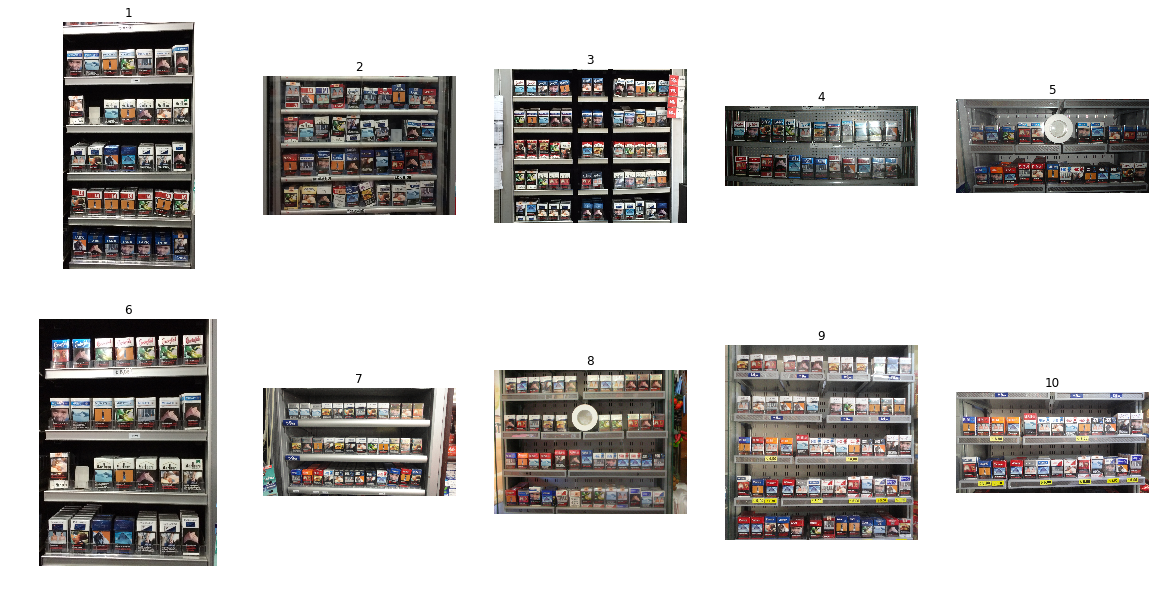

In [5]:
rows = 2
plt.figure(figsize=(20,10))
for id_, img_name in enumerate(train_img_list[:10]):  
    img_ = plt.imread(os.path.join(path_tr_img,img_name))
    plt.subplot(rows,5,id_+1)
    plt.title(id_+1)
    plt.axis('off')
    plt.imshow(img_)

# BBox on the images

In [6]:
metadata = pd.read_csv(path_metadata, sep = "delimiter", header = None)

/home/rahul/.conda/envs/penv/lib/python3.6/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [7]:
def split_list_nChunks(list_, file_name, nChuncks = 5):
    nChunks_list = [list_[i * nChuncks:(i + 1) * nChuncks] for i in range(int(len(list_) / nChuncks))] 
    bbox_list = []
    for chunk in nChunks_list:
        bbox_list.append(chunk + [file_name])
    return bbox_list

In [8]:
def preprocess_metadata(df):
    df_splitted = pd.DataFrame()
    for row_id in range(df.shape[0]):
        box_info = split_list_nChunks(df.iloc[row_id,0].split(' ')[2:], df.iloc[row_id,0].split(' ')[0])
        df_ = pd.DataFrame(np.array(box_info))
        df_splitted = df_splitted.append(df_)
    df_splitted.columns = ['x','y','w','h','brand','img_id']
    df_splitted = df_splitted[['img_id','x','y','w','h','brand']]
    return df_splitted      

In [9]:
metadata_ = preprocess_metadata(metadata)

In [10]:
metadata_.head()

,img_id,x,y,w,h,brand
0,C1_P01_N1_S2_1.JPG,1008,1552,252,376,0
1,C1_P01_N1_S2_1.JPG,1028,928,252,376,0
2,C1_P01_N1_S2_1.JPG,24,872,244,392,0
3,C1_P01_N1_S2_1.JPG,280,1568,252,376,0
4,C1_P01_N1_S2_1.JPG,292,872,252,376,0


In [11]:
img_name

'C3_P03_N3_S2_1.JPG'

In [12]:
train_img_list[0] == img_name

False

In [13]:
metadata_[metadata_['img_id'] == img_name].iloc[0,:]['x'] + metadata_[metadata_['img_id'] == img_name].iloc[0,:]['w']

'1204304'

In [14]:
def annotate_image(np_image, img_name, metadata_):
    df_ = metadata_[metadata_['img_id'] == img_name]
    for box_ in range(df_.shape[0]):
        x1 = int(df_.iloc[box_,:]['x'])
        y1 = int(df_.iloc[box_,:]['y'])
        x2 = int(df_.iloc[box_,:]['x']) + int(df_.iloc[box_,:]['w'])
        y2 = int(df_.iloc[box_,:]['y']) + int(df_.iloc[box_,:]['h'])
        cv2.rectangle(np_image, (x1, y1), (x2, y2), (0,255,0), 5)
    return np_image

In [2]:
# annotate = True
# zoom = 2
# fig = plt.figure()
# random.shuffle(train_img_list)
# for img_name in train_img_list:
#     img_ = plt.imread(os.path.join(path_tr_img,img_name))
#     if annotate:
#         img_ = annotate_image(img_, img_name, metadata_)
#     w, h = fig.get_size_inches()
#     fig.set_size_inches(w * zoom, h * zoom)
#     fig, ax = plt.subplots(figsize=(10,10))
#     ax.set_aspect(1)
#     ax.scatter(range(10), range(0,20,2))
#     dpi = fig.get_dpi()  
#     plt.imshow(img_)
#     plt.show()

In [27]:
metadata_.shape

(13184, 6)

# check results

In [29]:
import json
import os

In [32]:
metadata_.head()

,img_id,x,y,w,h,brand
0,C1_P01_N1_S2_1.JPG,1008,1552,252,376,0
1,C1_P01_N1_S2_1.JPG,1028,928,252,376,0
2,C1_P01_N1_S2_1.JPG,24,872,244,392,0
3,C1_P01_N1_S2_1.JPG,280,1568,252,376,0
4,C1_P01_N1_S2_1.JPG,292,872,252,376,0


In [30]:
ts_list = os.listdir('ShelfImages/test')

In [31]:
len(ts_list)

71

In [33]:
meta_ts = metadata_[metadata_['img_id'].isin(ts_list)]

In [34]:
meta_ts.shape

(2648, 6)

In [61]:
meta_ts.head()

,img_id,x,y,w,h,brand
0,C1_P02_N1_S5_1.JPG,1032,2080,172,328,0
1,C1_P02_N1_S5_1.JPG,1040,1092,152,300,0
2,C1_P02_N1_S5_1.JPG,1040,1600,184,292,0
3,C1_P02_N1_S5_1.JPG,1088,616,148,304,0
4,C1_P02_N1_S5_1.JPG,1128,124,180,312,0


In [62]:
ts_count = meta_ts.groupby(['img_id']).agg({
    'img_id':'count'
})

In [63]:
ts_count.columns = ['Original_Count']

In [64]:
ts_count.head()

,Original_Count
img_id,
C1_P02_N1_S5_1.JPG,46
C1_P02_N2_S2_1.JPG,20
C1_P02_N2_S3_1.JPG,34
C1_P03_N1_S2_1.JPG,29
C1_P03_N1_S3_1.JPG,45


In [65]:
def load_json(path, file):
    with open(os.path.join(path,file + '.json'), 'r') as outfile:
        js_ = json.load(outfile)
        no_ = len(js_['classes'])
        return no_

In [66]:
len(js_['classes'])

50

In [67]:
dframe = pd.DataFrame()
result_dict = {}
for file_ in ts_list:
    num_dect = load_json('output_json', file_)
    result_dict[file_] = num_dect

In [68]:
len(result_dict)

71

In [69]:
ts_count['Pred_count'] = ts_count.index.map(result_dict)

In [76]:
sum(ts_count['Original_Count'] == ts_count['Pred_count'])

35

In [84]:
ts_count.index = ts_count.index.map(lambda x: x.split('.')[0])

In [85]:
ts_count.head()

,Original_Count,Pred_count
img_id,,
C1_P02_N1_S5_1,46,50
C1_P02_N2_S2_1,20,27
C1_P02_N2_S3_1,34,29
C1_P03_N1_S2_1,29,30
C1_P03_N1_S3_1,45,46


In [86]:
ts_count_pred = ts_count['Pred_count'].to_dict()

In [89]:
ts_count_pred

{'C1_P02_N1_S5_1': 50,
 'C1_P02_N2_S2_1': 27,
 'C1_P02_N2_S3_1': 29,
 'C1_P03_N1_S2_1': 30,
 'C1_P03_N1_S3_1': 46,
 'C1_P03_N1_S4_1': 59,
 'C1_P03_N1_S4_2': 53,
 'C1_P03_N2_S2_1': 29,
 'C1_P03_N2_S3_1': 45,
 'C1_P03_N3_S2_1': 32,
 'C1_P04_N1_S4_1': 61,
 'C1_P04_N3_S3_1': 49,
 'C1_P05_N2_S4_2': 48,
 'C1_P05_N4_S3_1': 33,
 'C1_P06_N1_S3_1': 36,
 'C1_P06_N1_S4_1': 49,
 'C1_P06_N1_S5_1': 62,
 'C1_P06_N3_S3_1': 38,
 'C1_P08_N2_S4_1': 56,
 'C1_P08_N3_S3_1': 42,
 'C1_P10_N1_S3_1': 29,
 'C1_P10_N1_S5_1': 51,
 'C1_P10_N2_S3_1': 30,
 'C1_P11_N1_S3_1': 28,
 'C1_P11_N1_S4_2': 40,
 'C1_P11_N2_S3_2': 29,
 'C1_P11_N2_S4_2': 42,
 'C1_P11_N2_S4_3': 41,
 'C1_P12_N1_S2_1': 14,
 'C1_P12_N1_S3_1': 19,
 'C1_P12_N1_S5_1': 33,
 'C1_P12_N2_S3_1': 18,
 'C2_P01_N1_S4_1': 58,
 'C2_P01_N2_S2_1': 30,
 'C2_P01_N3_S3_1': 45,
 'C2_P02_N1_S3_1': 36,
 'C2_P02_N1_S4_1': 48,
 'C2_P03_N2_S3_1': 22,
 'C2_P04_N3_S2_1': 31,
 'C2_P05_N3_S3_1': 36,
 'C2_P07_N1_S6_1': 54,
 'C2_P07_N2_S2_1': 18,
 'C2_P08_N3_S3_2': 26,
 'C3_P01_N1

In [90]:
with open("image2products.json","w") as file:
    json.dump(ts_count_pred, file)

# calculating mAP, Precision and Recall

In [123]:
len(ts_list)

71

In [158]:
img_ = plt.imread('/home/rahul/Documents/FMCG_project/ShelfImages/test/C2_P03_N2_S3_1.JPG')

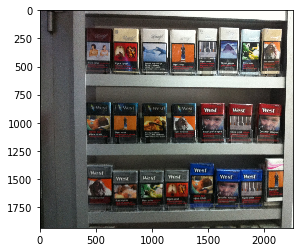

In [159]:
plt.imshow(img_)

In [160]:
with open(os.path.join("output_json","C2_P03_N2_S3_1.JPG"+".json"),"r") as file:
    json_ts = json.load(file)

In [162]:
len(json_ts['boxes'])

22

In [163]:
np.round(json_ts['scores'][0],4)

0.9998

In [164]:
def annotate_image(np_image, boxes_):
    for box_ in (boxes_):
        y1 = int(box_[0] * test_dict["C2_P03_N2_S3_1.JPG"]['height'])
        x1 = int(box_[1] * test_dict["C2_P03_N2_S3_1.JPG"]['width'])
        y2 = int(box_[2] * test_dict["C2_P03_N2_S3_1.JPG"]['height'])
        x2 = int(box_[3] * test_dict["C2_P03_N2_S3_1.JPG"]['width'])
        cv2.rectangle(np_image, (x1, y1), (x2, y2), (0,255,0), 10)
    return np_image

In [165]:
boxed_image = annotate_image(img_, json_ts['boxes'])

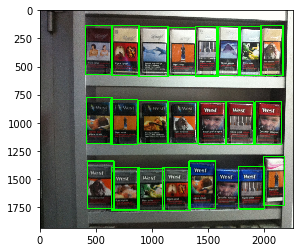

In [166]:
plt.imshow(boxed_image)

In [150]:
test_df = pd.read_csv("test.csv")

In [154]:
test_df_grouped = test_df.groupby(['filename']).agg({
    'width':'first',
    'height':'first'
})


test_dict = test_df_grouped.to_dict(orient='index')

In [155]:
test_df.head()

,width,height,class,xmin,ymin,xmax,ymax
filename,,,,,,,
C1_P02_N1_S5_1.JPG,2614,2448,Product,1032,2080,1204,2408
C1_P02_N1_S5_1.JPG,2614,2448,Product,1040,1092,1192,1392
C1_P02_N1_S5_1.JPG,2614,2448,Product,1040,1600,1224,1892
C1_P02_N1_S5_1.JPG,2614,2448,Product,1088,616,1236,920
C1_P02_N1_S5_1.JPG,2614,2448,Product,1128,124,1308,436


In [156]:
test_dict

{'C1_P02_N1_S5_1.JPG': {'width': 2614, 'height': 2448},
 'C1_P02_N2_S2_1.JPG': {'width': 3264, 'height': 2448},
 'C1_P02_N2_S3_1.JPG': {'width': 3264, 'height': 2448},
 'C1_P03_N1_S2_1.JPG': {'width': 3264, 'height': 1851},
 'C1_P03_N1_S3_1.JPG': {'width': 3264, 'height': 2203},
 'C1_P03_N1_S4_1.JPG': {'width': 3264, 'height': 2448},
 'C1_P03_N1_S4_2.JPG': {'width': 2900, 'height': 1972},
 'C1_P03_N2_S2_1.JPG': {'width': 3264, 'height': 1785},
 'C1_P03_N2_S3_1.JPG': {'width': 3264, 'height': 2198},
 'C1_P03_N3_S2_1.JPG': {'width': 3264, 'height': 1801},
 'C1_P04_N1_S4_1.JPG': {'width': 3222, 'height': 2448},
 'C1_P04_N3_S3_1.JPG': {'width': 3264, 'height': 2448},
 'C1_P05_N2_S4_2.JPG': {'width': 3264, 'height': 2448},
 'C1_P05_N4_S3_1.JPG': {'width': 3264, 'height': 2024},
 'C1_P06_N1_S3_1.JPG': {'width': 3264, 'height': 2448},
 'C1_P06_N1_S4_1.JPG': {'width': 3264, 'height': 2448},
 'C1_P06_N1_S5_1.JPG': {'width': 2555, 'height': 2448},
 'C1_P06_N3_S3_1.JPG': {'width': 3264, 'height':

In [157]:
test_dict[ts_list[0]]

{'width': 2257, 'height': 1936}

In [177]:

import sys

In [185]:
def create_boxes(filename_, boxes_, scores_, classes_):
    processed_info = []
    for class_, box_, score_ in zip(classes_,boxes_, scores_):
        y1 = int(box_[0] * test_dict[filename_]['height'])
        x1 = int(box_[1] * test_dict[filename_]['width'])
        y2 = int(box_[2] * test_dict[filename_]['height'])
        x2 = int(box_[3] * test_dict[filename_]['width'])
        processed_info.append([class_,np.round(score_,4),x1,y1,x2,y2])
    return processed_info

In [204]:
def list_to_text_conversion(list_):
    txt_ = ' '.join([str(i) for i in list_])
    return txt_

In [186]:
def load_json_results(file_name):
    with open(os.path.join("output_json",file_name+".json"),"r") as file:
        json_ts = json.load(file)
    return json_ts

In [211]:
def save_to_txt(filename, list_):  
    with open(os.path.join('Object-Detection-Metrics','detections',filename.split('.')[0] + '.txt'), 'w') as f:
        for item in list_:
            item = list_to_text_conversion(item)
            f.write("%s\n" % item)
    return None

In [212]:
for ts_file in ts_list:
    json_ts = load_json_results(ts_file)
    ts_info_ = create_boxes(ts_file, json_ts['boxes'], json_ts['scores'], json_ts['classes'])
    save_to_txt(ts_file,ts_info_)


In [188]:
json_ts.keys()

dict_keys(['classes', 'boxes', 'scores'])

In [190]:
ts_all_info[0]

[['Product', 0.9998, 878, 145, 1137, 587],
 ['Product', 0.9997, 639, 139, 881, 578],
 ['Product', 0.9991, 402, 138, 645, 572],
 ['Product', 0.9986, 1140, 153, 1383, 582],
 ['Product', 0.9979, 1956, 139, 2159, 579],
 ['Product', 0.9977, 627, 795, 868, 1191],
 ['Product', 0.995, 878, 806, 1136, 1188],
 ['Product', 0.9937, 1766, 146, 1970, 583],
 ['Product', 0.9931, 1378, 143, 1589, 586],
 ['Product', 0.9907, 422, 1341, 658, 1760],
 ['Product', 0.9845, 1144, 812, 1399, 1188],
 ['Product', 0.9744, 1409, 814, 1657, 1192],
 ['Product', 0.9744, 1324, 1341, 1561, 1763],
 ['Product', 0.9705, 1091, 1401, 1333, 1782],
 ['Product', 0.9702, 1913, 809, 2147, 1193],
 ['Product', 0.9633, 415, 777, 640, 1185],
 ['Product', 0.9562, 1573, 145, 1776, 583],
 ['Product', 0.93, 1652, 814, 1901, 1194],
 ['Product', 0.9216, 865, 1405, 1103, 1781],
 ['Product', 0.9113, 633, 1397, 880, 1776],
 ['Product', 0.5597, 1983, 1298, 2169, 1735],
 ['Product', 0.3561, 1764, 1392, 1991, 1766]]

In [194]:
l_ = ['Product', 0.9998, 878, 145, 1137, 587]

In [196]:
[str(i) for i in l_]

['Product', '0.9998', '878', '145', '1137', '587']

In [198]:
' '.join([str(i) for i in l_])

'Product 0.9998 878 145 1137 587'

In [213]:
test_df.head()

,width,height,class,xmin,ymin,xmax,ymax
filename,,,,,,,
C1_P02_N1_S5_1.JPG,2614,2448,Product,1032,2080,1204,2408
C1_P02_N1_S5_1.JPG,2614,2448,Product,1040,1092,1192,1392
C1_P02_N1_S5_1.JPG,2614,2448,Product,1040,1600,1224,1892
C1_P02_N1_S5_1.JPG,2614,2448,Product,1088,616,1236,920
C1_P02_N1_S5_1.JPG,2614,2448,Product,1128,124,1308,436


In [222]:
test_df_ = test_df.drop(['width','height'], axis = 1)

In [223]:
test_df_.head()

,class,xmin,ymin,xmax,ymax
filename,,,,,
C1_P02_N1_S5_1.JPG,Product,1032,2080,1204,2408
C1_P02_N1_S5_1.JPG,Product,1040,1092,1192,1392
C1_P02_N1_S5_1.JPG,Product,1040,1600,1224,1892
C1_P02_N1_S5_1.JPG,Product,1088,616,1236,920
C1_P02_N1_S5_1.JPG,Product,1128,124,1308,436


In [220]:
test_df[test_df.index == 'C1_P02_N1_S5_1.JPG'].values.tolist()

[[2614, 2448, 'Product', 1032, 2080, 1204, 2408],
 [2614, 2448, 'Product', 1040, 1092, 1192, 1392],
 [2614, 2448, 'Product', 1040, 1600, 1224, 1892],
 [2614, 2448, 'Product', 1088, 616, 1236, 920],
 [2614, 2448, 'Product', 1128, 124, 1308, 436],
 [2614, 2448, 'Product', 116, 1592, 300, 1904],
 [2614, 2448, 'Product', 1172, 1104, 1324, 1404],
 [2614, 2448, 'Product', 1204, 2072, 1376, 2400],
 [2614, 2448, 'Product', 1212, 1608, 1376, 1888],
 [2614, 2448, 'Product', 1212, 624, 1360, 928],
 [2614, 2448, 'Product', 1308, 1104, 1460, 1404],
 [2614, 2448, 'Product', 1308, 156, 1488, 440],
 [2614, 2448, 'Product', 1340, 628, 1488, 932],
 [2614, 2448, 'Product', 1348, 2068, 1520, 2396],
 [2614, 2448, 'Product', 1364, 1608, 1528, 1888],
 [2614, 2448, 'Product', 140, 1084, 304, 1380],
 [2614, 2448, 'Product', 1428, 1108, 1580, 1408],
 [2614, 2448, 'Product', 1472, 176, 1652, 460],
 [2614, 2448, 'Product', 1476, 652, 1604, 936],
 [2614, 2448, 'Product', 1508, 2056, 1680, 2384],
 [2614, 2448, 'Pro

In [224]:
def list_to_text_conversion(list_):
    txt_ = ' '.join([str(i) for i in list_])
    return txt_

In [225]:
def save_to_txt(filename, list_, folder):  
    with open(os.path.join('Object-Detection-Metrics',folder,filename.split('.')[0] + '.txt'), 'w') as f:
        for item in list_:
            item = list_to_text_conversion(item)
            f.write("%s\n" % item)
    return None

In [227]:
for ts_file in ts_list:
    ts_sub_list = test_df_[test_df_.index == ts_file].values.tolist()
    save_to_txt(ts_file,ts_sub_list,'groundtruths')